In [ ]:
pip install pandas numpy matplotlib seaborn scikit-learn


In [1]:
from google.colab import files

uploaded = files.upload()


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


FileNotFoundError: [Errno 2] No such file or directory: 'WA_Fn-UseC_-Telco-Customer-Churn.xlsx'

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-n

<ipython-input-2-02f7b4c61244>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)



After Encoding:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  customerID_0003-MKNFE  \
0              0       1           29.85         29.85                  False   
1              0      34           56.95       1889.50                  False   
2              0       2           53.85        108.15                  False   
3              0      45           42.30       1840.75                  False   
4              0       2           70.70        151.65                  False   

   customerID_0004-TLHLJ  customerID_0011-IGKFF  customerID_0013-EXCHZ  \
0                  False                  False                  False   
1                  False                  False                  False   
2                  False                  False                  False   
3                  False                  False                  False   
4                  False                  False                  False   

   customerID_0013-MHZWF  customerID_0013-SMEOE  ..

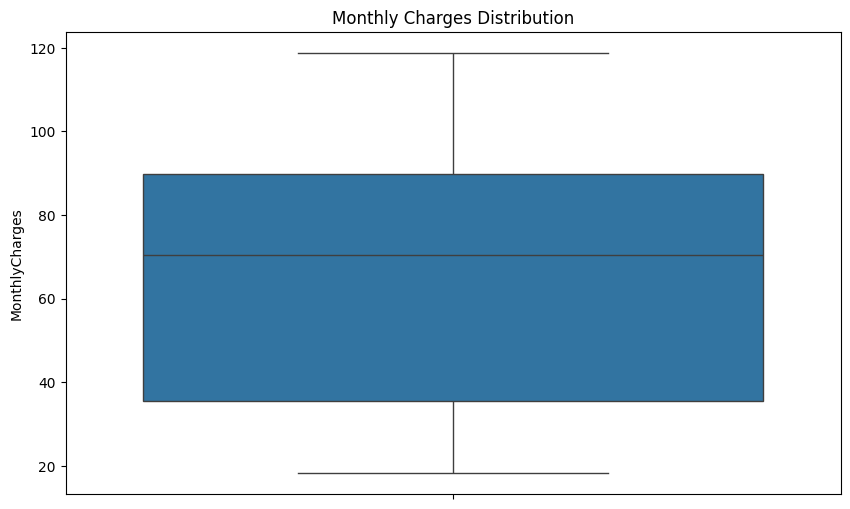


Preprocessing complete. Cleaned data saved.


In [2]:
#Step 1: Data cleaning and preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

print("Dataset Info:")
data.info()

print("\nMissing Values:")
print(data.isnull().sum())

print("\Sample Data:")
print(data.head())

data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(),inplace=True)

data=pd.get_dummies(data,drop_first=True)

print("\nAfter Encoding:")
print(data.head())

plt.figure(figsize=(10,6))
sns.boxplot(data['MonthlyCharges'])
plt.title("Monthly Charges Distribution")
plt.show()

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
data[['MonthlyCharges','TotalCharges']]=scaler.fit_transform(data[['MonthlyCharges','TotalCharges']])

data.to_csv('cleaned_telco_churn.csv',index=False)
print("\nPreprocessing complete. Cleaned data saved.")

<ipython-input-3-50c6d1178012>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


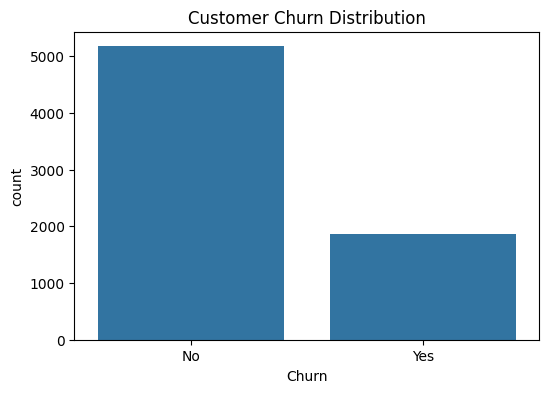

Churn Rate:
 Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


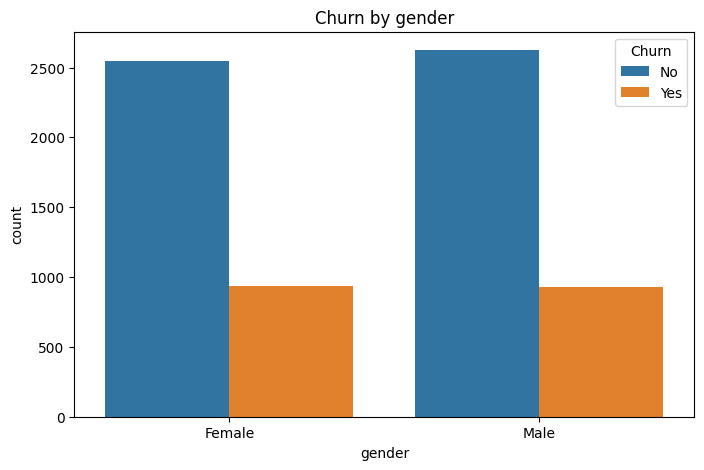

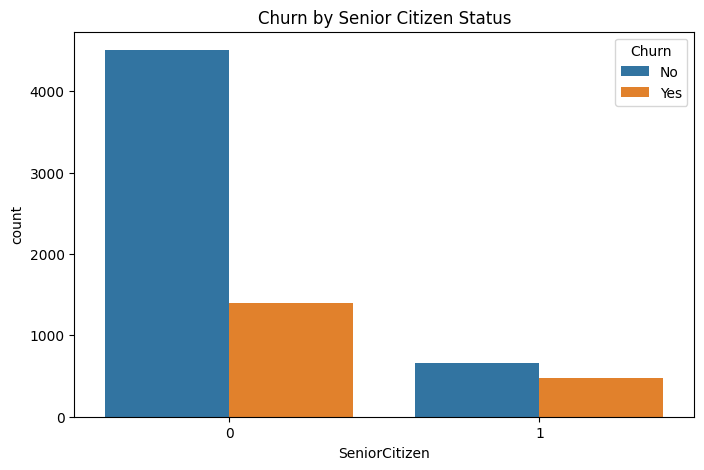

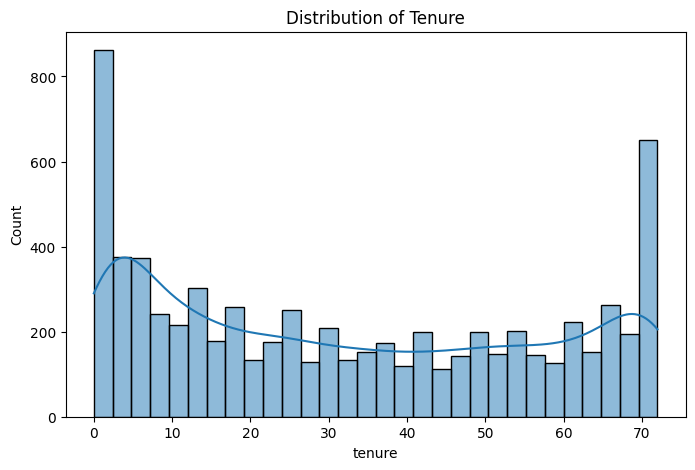

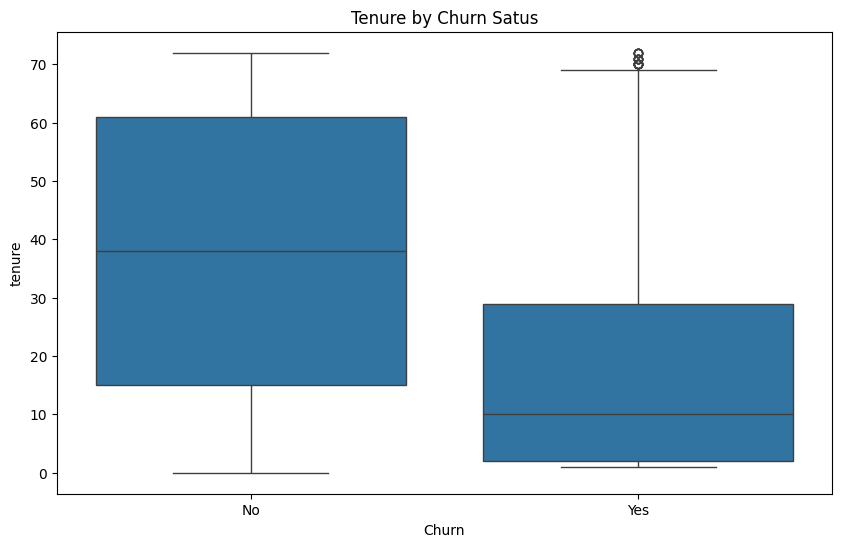

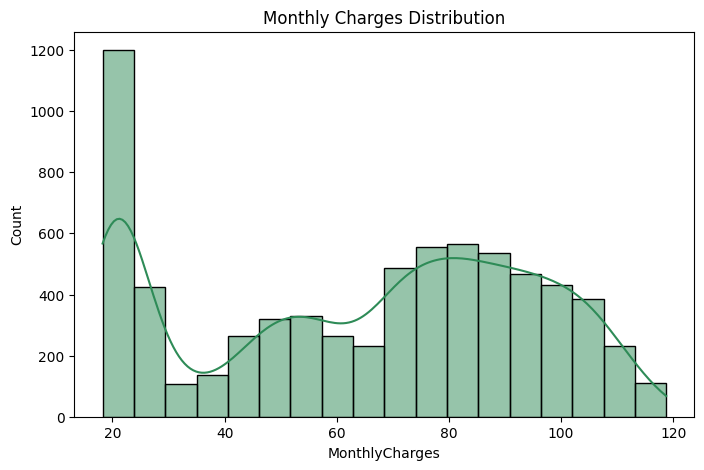

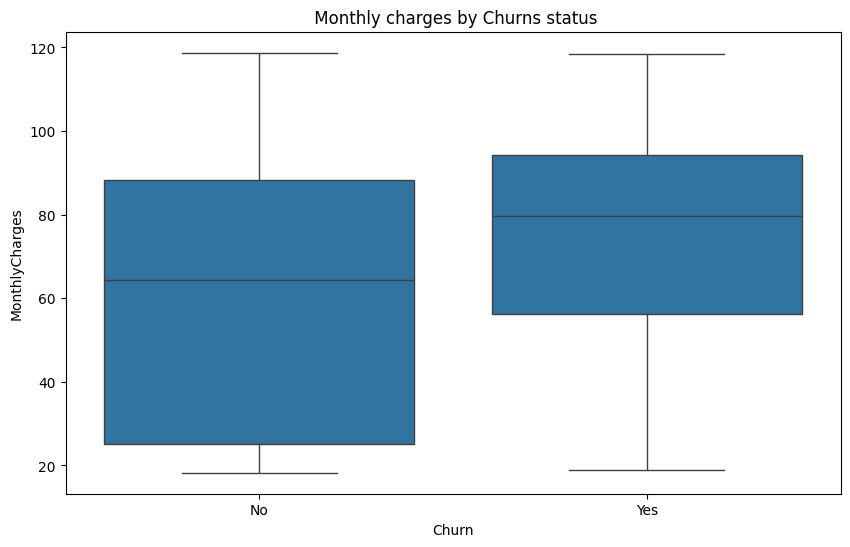

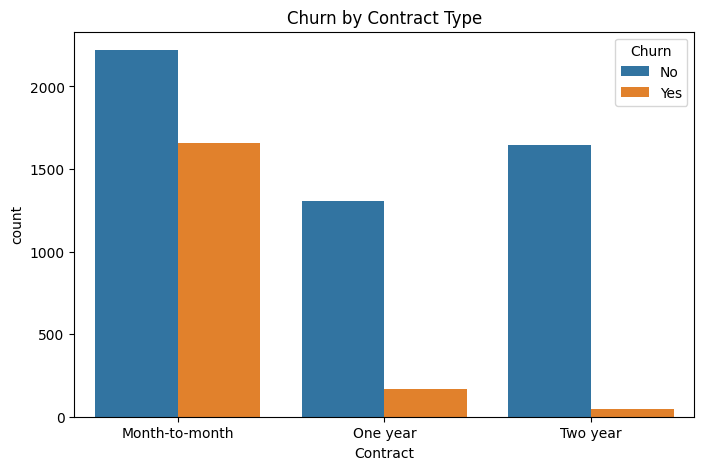

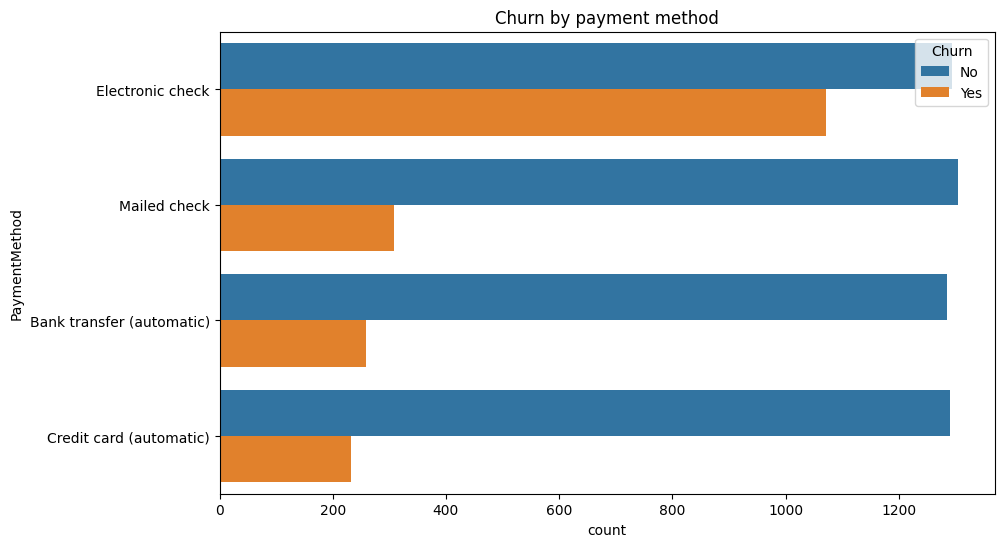

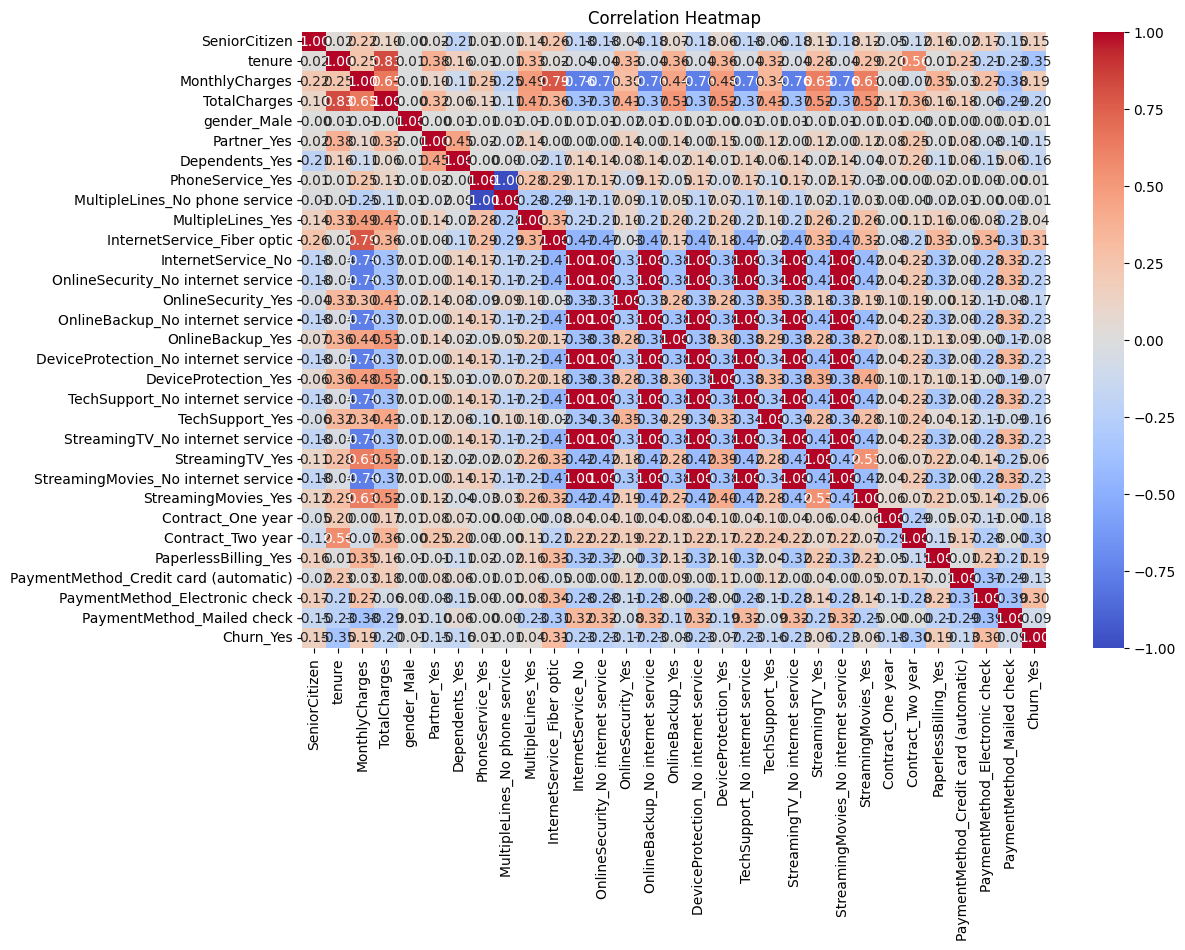

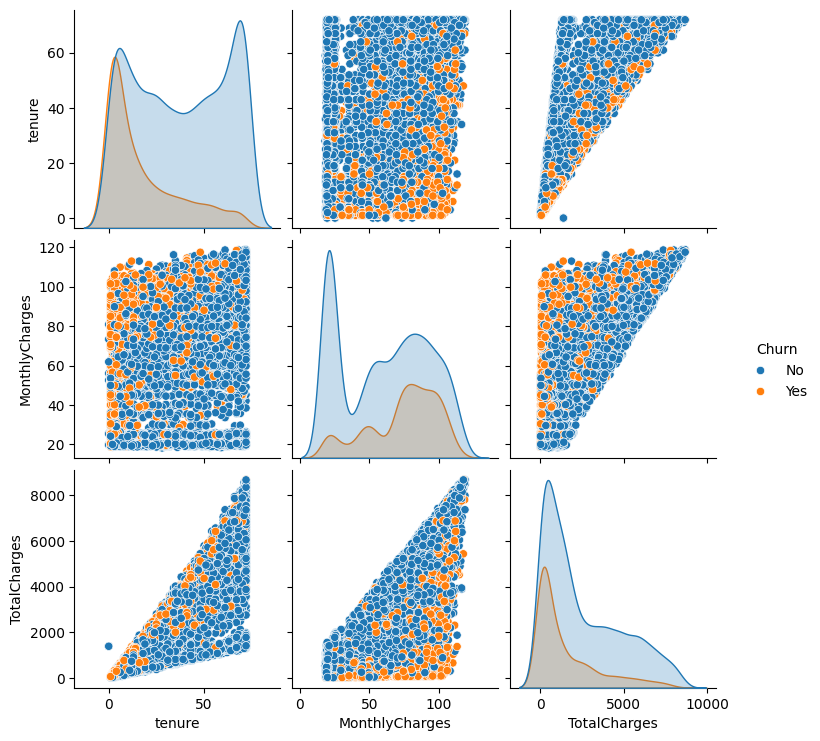

In [3]:
#Step2: Exploratory Data Analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('cleaned_telco_churn.csv')
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.drop(['customerID'], axis=1, inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

data_encoded = pd.get_dummies(data, drop_first=True)

print(data.info())
print(data.describe())
data.head()

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=data)
plt.title('Customer Churn Distribution')
plt.show()

churn_rate=data['Churn'].value_counts(normalize=True)*100
print("Churn Rate:\n",churn_rate)

plt.figure(figsize=(8,5))
sns.countplot(x='gender',hue='Churn',data=data)
plt.title("Churn by gender")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)
plt.title('Churn by Senior Citizen Status')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data['tenure'],bins=30,kde=True)
plt.title('Distribution of Tenure')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Churn',y='tenure',data=data)
plt.title('Tenure by Churn Satus')
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(data['MonthlyCharges'], kde=True, color='seagreen')
plt.title('Monthly Charges Distribution')
plt.show()

plt.figure(figsize=(10,6))
sns.boxplot(x='Churn',y='MonthlyCharges', data=data)
plt.title(" Monthly charges by Churns status")
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=data)
plt.title('Churn by Contract Type')
plt.show()

plt.figure(figsize=(10,6))
sns.countplot(y='PaymentMethod', hue='Churn', data=data)
plt.title("Churn by payment method")
plt.show()

plt.figure(figsize=(12,8))
corr=data_encoded.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn')
plt.show()


<ipython-input-4-95997eed04c4>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


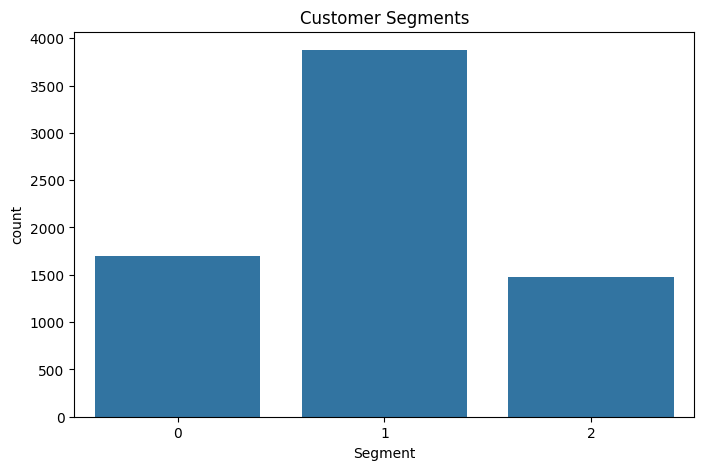

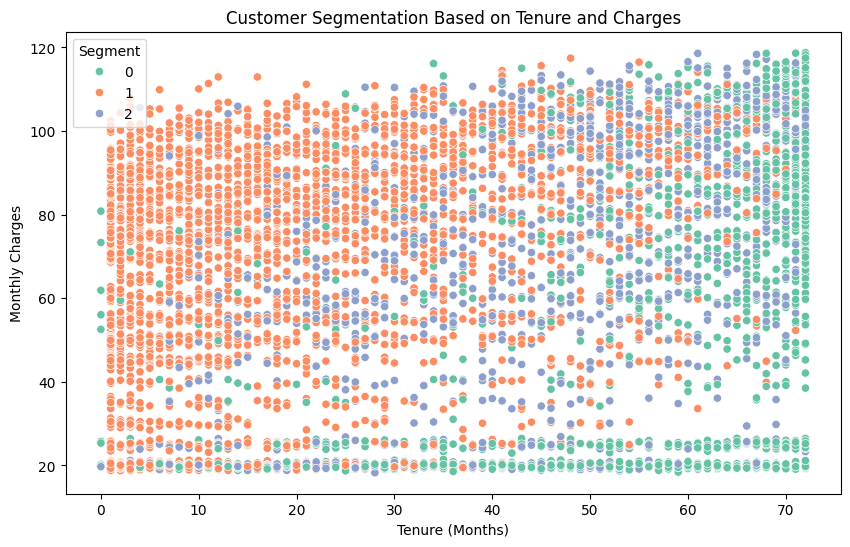

,tenure,MonthlyCharges,TotalCharges,Count
Segment,,,,
0,56.735103,60.770413,3715.179027,1695
1,18.036645,66.398490,1369.254581,3875
2,42.044807,65.048608,3033.571606,1473


In [4]:
#Step3: Customer Segmentation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.drop(['customerID'], axis=1, inplace=True)

data['TotalCharges']=pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

data_encoded=pd.get_dummies(data, drop_first=True)
data_encoded.head()

X=data_encoded[['tenure','MonthlyCharges','Contract_Two year','Contract_One year']]

scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

kmeans=KMeans(n_clusters=3,random_state=42)
data['Segment']=kmeans.fit_predict(X_scaled)

plt.figure(figsize=(8,5))
sns.countplot(x='Segment',data=data)
plt.title('Customer Segments')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Segment', data=data, palette='Set2')
plt.title('Customer Segmentation Based on Tenure and Charges')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

segment_summary = data.groupby('Segment')[['tenure', 'MonthlyCharges', 'TotalCharges']].mean()
segment_summary['Count'] = data['Segment'].value_counts()
segment_summary



<ipython-input-5-3799f00f2e72>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)


Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.90      0.88      1539
        True       0.69      0.58      0.63       574

    accuracy                           0.81      2113
   macro avg       0.77      0.74      0.75      2113
weighted avg       0.81      0.81      0.81      2113



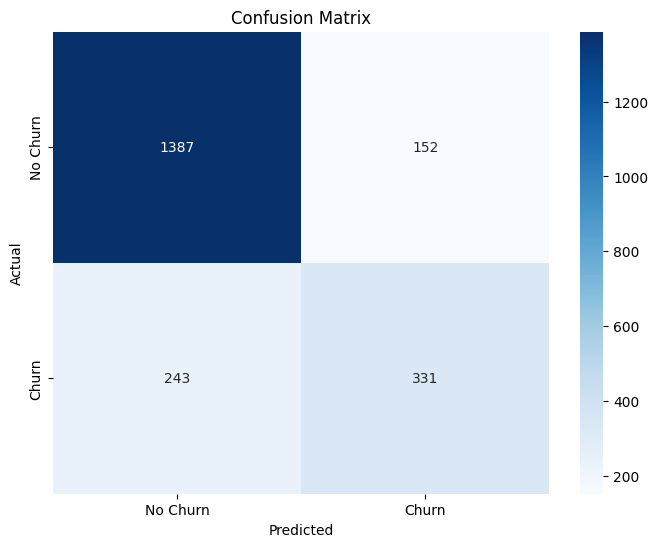

Accuracy: 0.81


In [5]:
#Step4: Churn Prediction Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.drop(['customerID'], axis=1, inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

data_encoded = pd.get_dummies(data, drop_first=True)
data_encoded.head()

X = data_encoded.drop('Churn_Yes', axis=1)
y = data_encoded['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'gender_Male', 'Partner_Yes', 'Dependents_Yes', 'PhoneService_Yes',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No internet service', 'StreamingMovies_Yes',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling_Yes',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Churn_Yes'],
      dtype='object')
Classification Report:
               precision    recall  f1-score   support

       False       0.82      

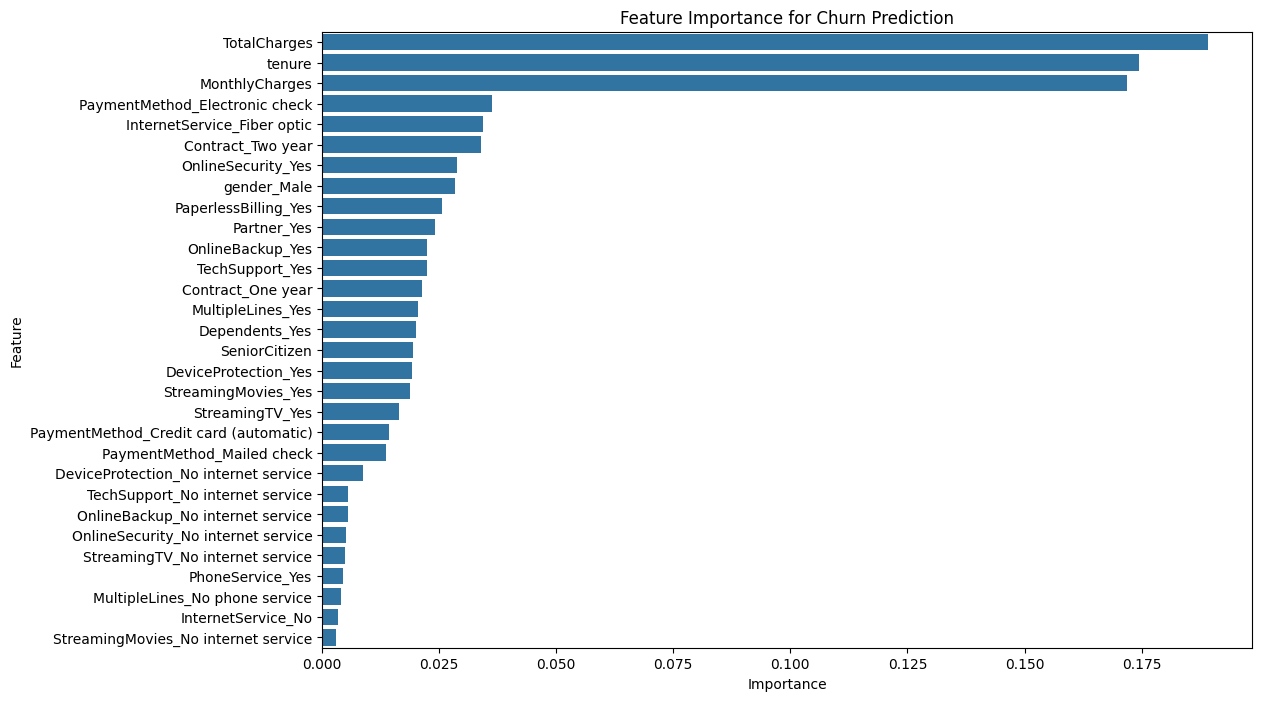

High-Value Customers at Risk of Churn:
 Empty DataFrame
Columns: [gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn, LTV]
Index: []

[0 rows x 21 columns]


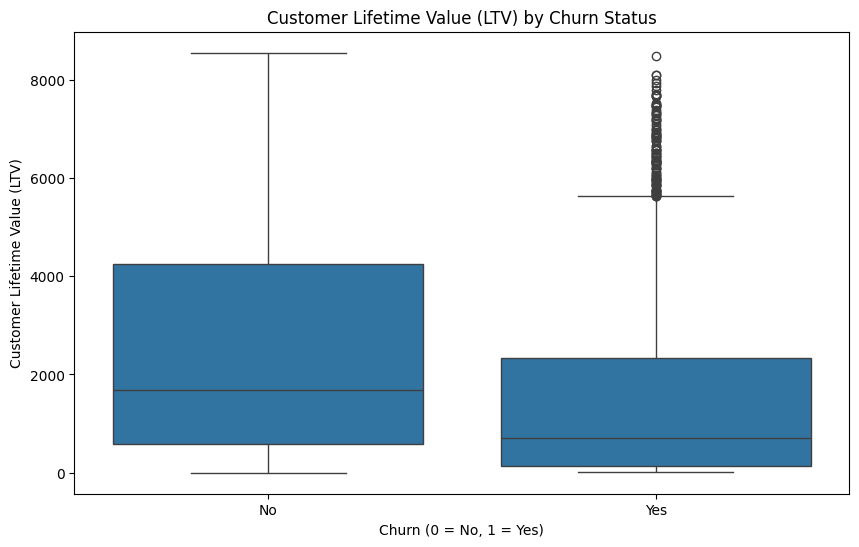

In [12]:
#Step5:Customer Retention Strategies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

data.drop(['customerID'], axis=1, inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'] = data['TotalCharges'].fillna(data['TotalCharges'].median())

data_encoded = pd.get_dummies(data, drop_first=True)

print(data_encoded.columns)

if 'Churn_Yes' in data_encoded.columns:
    X = data_encoded.drop('Churn_Yes', axis=1)
    y = data_encoded['Churn_Yes']
else:
    X = data_encoded.drop('Churn', axis=1)
    y = data_encoded['Churn']



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))


feature_importance = pd.Series(model.feature_importances_, index=X.columns)
feature_importance = feature_importance.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.title('Feature Importance for Churn Prediction')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

data['LTV'] = data['tenure'] * data['MonthlyCharges']

high_value_threshold = data['LTV'].quantile(0.75)
high_value_customers = data[data['LTV'] > high_value_threshold]

print("High-Value Customers at Risk of Churn:\n", high_value_customers[high_value_customers['Churn'] == 1])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='LTV', data=data)
plt.title('Customer Lifetime Value (LTV) by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Customer Lifetime Value (LTV)')
plt.show()





<ipython-input-13-b35d337a7ab6>:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)
<ipython-input-13-b35d337a7ab6>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=data, palette='Set2')


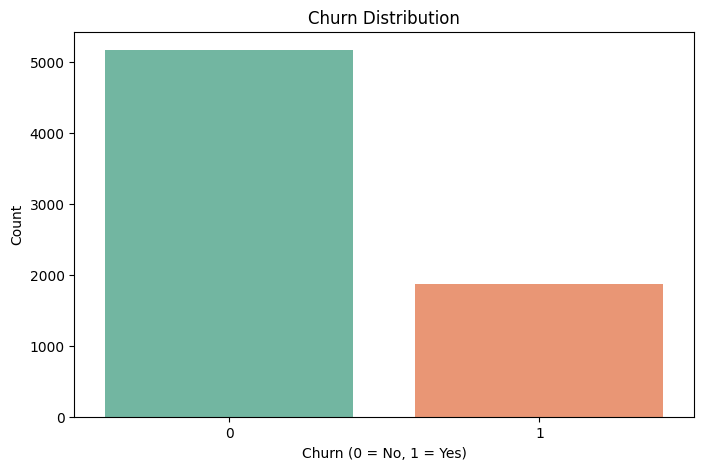

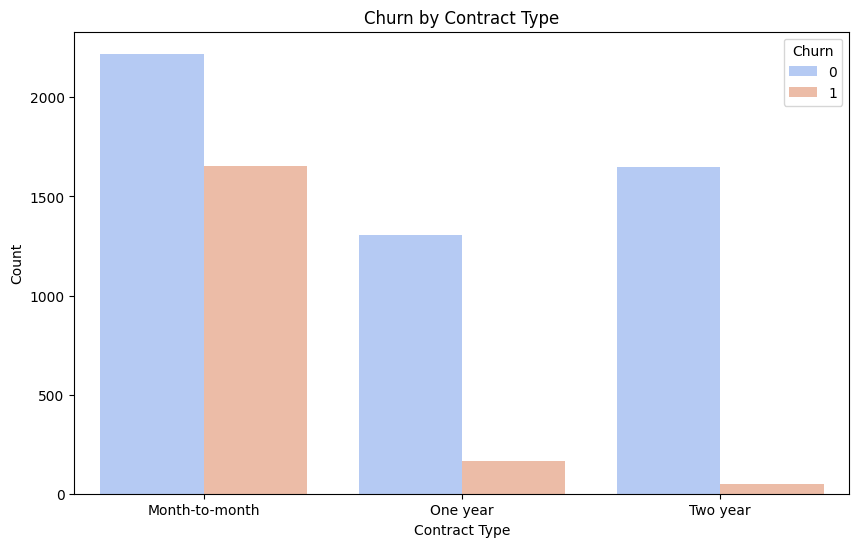

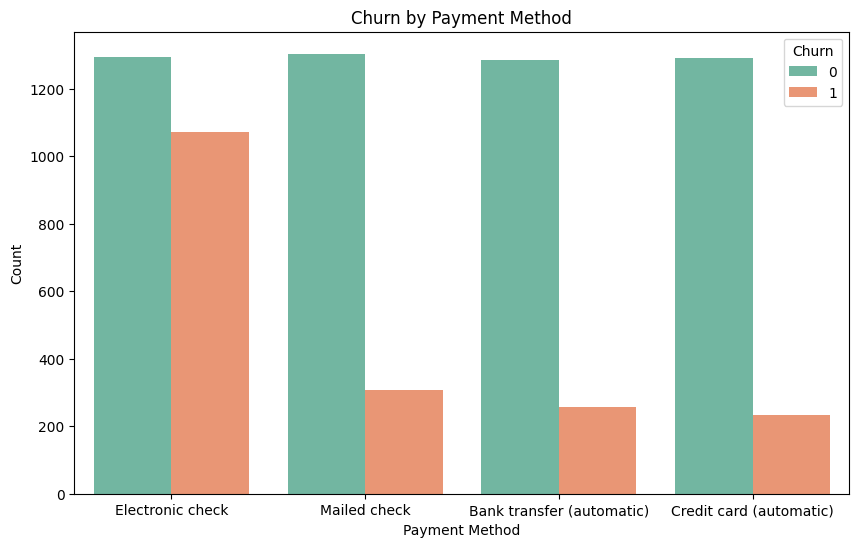

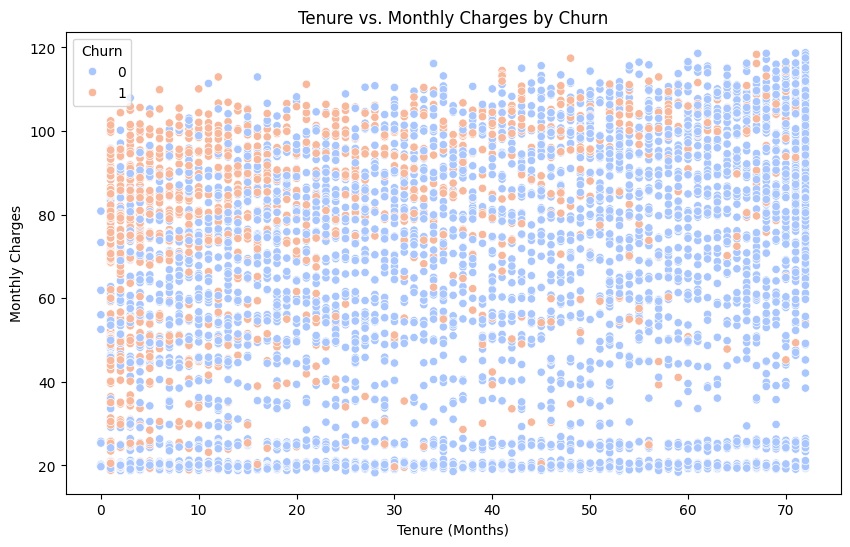

<ipython-input-13-b35d337a7ab6>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')


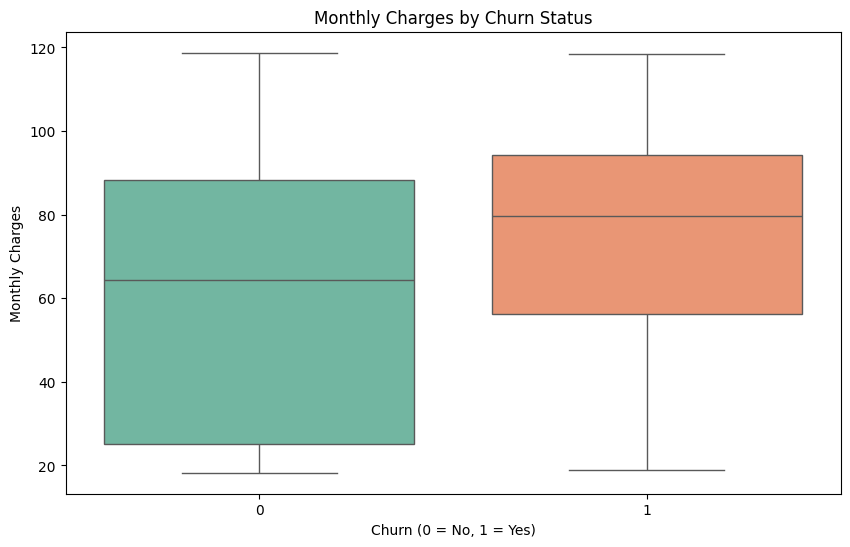

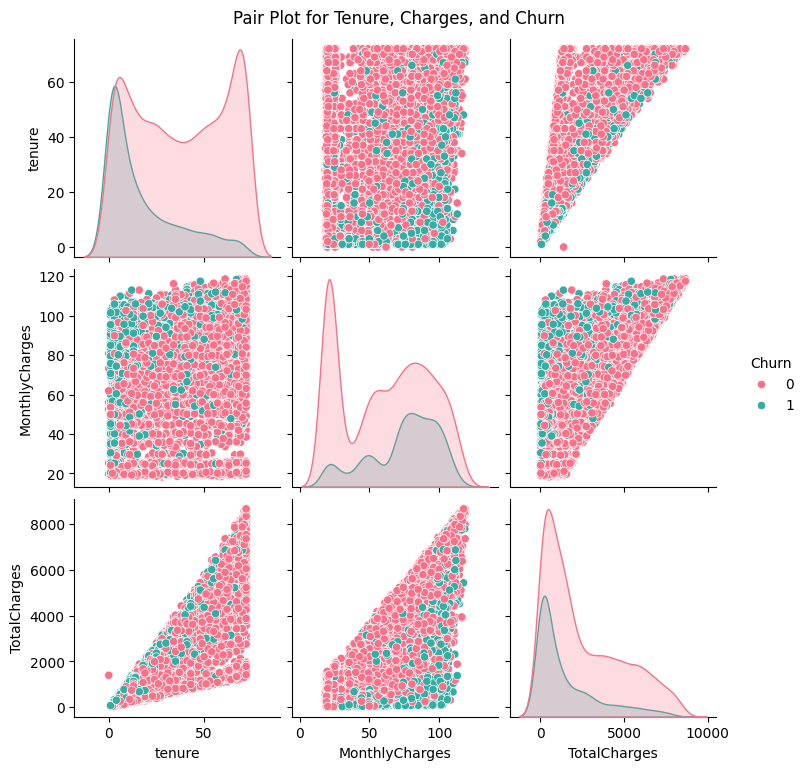

In [13]:
#Step 6: Data Visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.drop(['customerID'], axis=1, inplace=True)

data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

data['Churn']=data['Churn'].map({'Yes':1,'No':0})

data_encoded = pd.get_dummies(data, drop_first=True)

plt.figure(figsize=(8, 5))
sns.countplot(x='Churn', data=data, palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Contract', hue='Churn', data=data, palette='coolwarm')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='PaymentMethod', hue='Churn', data=data, palette='Set2')
plt.title('Churn by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Churn', data=data, palette='coolwarm')
plt.title('Tenure vs. Monthly Charges by Churn')
plt.xlabel('Tenure (Months)')
plt.ylabel('Monthly Charges')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=data, palette='Set2')
plt.title('Monthly Charges by Churn Status')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Monthly Charges')
plt.show()

sns.pairplot(data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']], hue='Churn', palette='husl')
plt.suptitle('Pair Plot for Tenure, Charges, and Churn', y=1.02)
plt.show()

